Informações do CSV retiradas do site https://www.kaggle.com/neuromusic/avocado-prices
##Introdução aos Dados
Esses dados foram baixados do site da Hass Avocado Board em maio de 2018 e compilados em um único CSV. Veja como o Hass Avocado Board descreve os dados em seu site:

"A tabela abaixo representa os dados de varredura de varejo semanais de 2018 para o volume (unidades) e preço do varejo nacional. Os dados de varredura de varejo vêm diretamente das caixas registradoras dos varejistas com base nas vendas reais de abacates Hass no varejo. A partir de 2013, a tabela abaixo reflete um conjunto de dados de varejo expandido e com vários pontos de venda. Os relatórios de vários pontos de venda incluem uma agregação dos seguintes canais: mercearia, missa, clube, droga, dólar e militar. O Preço Médio (de abacates) na tabela reflete um custo por unidade (por abacate), mesmo quando várias unidades (abacates) são vendidas em sacos. Os códigos de pesquisa de produto (PLU's) na tabela são apenas para abacates Hass. Outras variedades de abacates (por exemplo, peles verdes) não estão incluídas nesta tabela."

##Algumas colunas relevantes no conjunto de dados:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

## Imports e definição do DF

In [2076]:
% matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2077]:
avocado_df=pd.read_csv("https://raw.githubusercontent.com/badeca/Avocado-Dataset/main/Avocado/avocado.csv",encoding = "ISO-8859-1")

In [2078]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##Removendo colunas desnecessárias e criando cópia do DF
#####4046 = Número de avocados vendidos com PLU 4046
#####4225 = Número de avocados vendidos com PLU 4225
#####4770 = Número de avocados vendidos com PLU 4770

In [2079]:
avocado_df.drop(avocado_df.columns[avocado_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df = avocado_df.rename(columns={'Date': 'date', 'AveragePrice': 'average_price', 'Small Bags': 'small_bags', 'Large Bags': 'large_bags', 'XLarge Bags': 'xlarge_bags', 'Total Volume': 'total_volume', 'Total Bags': 'total_bags'})
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##Definições iniciais do DF + Setando campos como categóricos

In [2080]:
df.shape

(18249, 13)

In [2081]:
df.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [2082]:
df.dtypes

date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
region            object
dtype: object

In [2083]:
df['type'] = df['type'].astype('category')
df['region'] = df['region'].astype('category')
df['year'] = df['year'].astype('category')

In [2084]:
df.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
region           0
dtype: int64

In [2085]:
#remove instâncias com ao menos 1 coluna com dado ausente
df = df.dropna()
df.shape
# não muda pois não há dados nulos

(18249, 13)

In [2086]:
df['type'].cat.categories

Index(['conventional', 'organic'], dtype='object')

In [2087]:
df['type'] = df['type'].cat.codes
# 0 = conventional, 1 = organic

In [2088]:
df['region'].cat.categories

Index(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver', 'Detroit',
       'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewOrleansMobile', 'NewYork', 'Northeast',
       'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson',
       'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro',
       'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco',
       'Seattle', 'SouthCarolina', 'SouthCentral', 'Southeast', 'Spokane',
       'StLouis', 'Syracuse', 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'],
      dtype='object')

In [2089]:
df['year'].cat.categories

Int64Index([2015, 2016, 2017, 2018], dtype='int64')

In [2090]:
df.dtypes

date               object
average_price     float64
total_volume      float64
4046              float64
4225              float64
4770              float64
total_bags        float64
small_bags        float64
large_bags        float64
xlarge_bags       float64
type                 int8
year             category
region           category
dtype: object

In [2091]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


## Checando se há alguma data esquisita ou dados negativos



In [2092]:
# 2016 foi ano bissexto
# retorna 'true' se alguma data estiver fora do padrão
def checkup_date():
  for date in df['date']:
    date_aux = date.split('-')
    if date_aux[2] < '01':
      return 'true'
    elif date_aux[2] > '31':
      return 'true'
    elif date_aux[1] in ['04', '06', '09', '11']:
      if date_aux[2] > '30':
        return 'true'
    elif date_aux[1] == '02':
      if date_aux[0] == '2016':
        if date_aux[2] > '29':
          return 'true'
      elif date_aux[2] > '28':
        return 'true'
    else: 
      return 'false'

print(checkup_date())

false


In [2093]:
#checando se há dados negativos
#preferi não transformar date em dado categórico pois ela não tinha poucos valores únicos e também pq poderia checar no min e no max quais as datas mais antigas e novas
df.min()

date             2015-01-04
average_price          0.44
total_volume          84.56
4046                      0
4225                      0
4770                      0
total_bags                0
small_bags                0
large_bags                0
xlarge_bags               0
type                      0
dtype: object

In [2094]:
df.max()

date              2018-03-25
average_price           3.25
total_volume     6.25056e+07
4046             2.27436e+07
4225             2.04706e+07
4770             2.54644e+06
total_bags       1.93731e+07
small_bags       1.33846e+07
large_bags        5.7191e+06
xlarge_bags           551694
type                       1
dtype: object

In [2095]:
# Quantidade de xlarge_bags que é diferente de 0
len(df) - df[df['xlarge_bags'] == 0]['xlarge_bags'].count()

6201

##Removendo duplicatas

In [2096]:
df[df.duplicated()].sort_values("year").head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region


In [2097]:
df.drop_duplicates(keep = False, inplace = True)
print(len(df))

18249


##Normalização

In [2098]:
df_norm = df.copy(deep=True)
df_norm['date'] = df_norm['date'].astype('category')
df_norm['date'] = df_norm['date'].cat.codes
df_norm['year'] = df_norm['year'].cat.codes
df_norm['region'] = df_norm['region'].cat.codes
df_norm.dtypes

date               int16
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type                int8
year                int8
region              int8
dtype: object

In [2099]:
df_norm.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0


In [2100]:
# creio que total_volume e 4225 estejam dominando
dist = np.linalg.norm(df_norm.values[1]-df_norm.values[2])
print(dist)

90430.92722628193


In [2101]:
df_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min())
df_norm.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,0.303571,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0,0.0,0.0
1,0.297619,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0,0.0,0.0
2,0.291667,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0,0.0,0.0
3,0.285714,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0,0.0,0.0
4,0.279762,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0,0.0,0.0


In [2102]:
dist = np.linalg.norm(df_norm.values[1]-df_norm.values[2])
print(dist)

0.14962134837599522


In [2103]:
df_norm.max()

date             1.0
average_price    1.0
total_volume     1.0
4046             1.0
4225             1.0
4770             1.0
total_bags       1.0
small_bags       1.0
large_bags       1.0
xlarge_bags      1.0
type             1.0
year             1.0
region           1.0
dtype: float64

In [2104]:
df_norm.min()

date             0.0
average_price    0.0
total_volume     0.0
4046             0.0
4225             0.0
4770             0.0
total_bags       0.0
small_bags       0.0
large_bags       0.0
xlarge_bags      0.0
type             0.0
year             0.0
region           0.0
dtype: float64

In [2105]:
# nomalizando com média e desvio padrão do scikit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df['total_volume_norm'] = scaler.fit_transform(df[['total_volume']])
df['total_volume_norm'].describe()

count    1.824900e+04
mean     8.391160e-17
std      1.000027e+00
min     -2.462926e-01
25%     -2.431786e-01
50%     -2.152245e-01
75%     -1.209462e-01
max      1.785316e+01
Name: total_volume_norm, dtype: float64

In [2106]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,total_volume_norm
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,-0.227716
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,-0.230427
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,-0.212085
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,-0.223444
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,-0.231538


##Discretização

In [2107]:
df['average_price_dist'] = pd.cut(df['average_price'],10)

In [2108]:
df['average_price_dist'].value_counts()

(1.002, 1.283]    4824
(1.283, 1.564]    4506
(1.564, 1.845]    3412
(0.721, 1.002]    2632
(1.845, 2.126]    1672
(2.126, 2.407]     598
(0.437, 0.721]     331
(2.407, 2.688]     177
(2.688, 2.969]      86
(2.969, 3.25]       11
Name: average_price_dist, dtype: int64

In [2109]:
df['average_price'].describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: average_price, dtype: float64

In [2110]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,total_volume_norm,average_price_dist
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,-0.227716,"(1.283, 1.564]"
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,-0.230427,"(1.283, 1.564]"
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,-0.212085,"(0.721, 1.002]"
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,-0.223444,"(1.002, 1.283]"
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,-0.231538,"(1.002, 1.283]"


##Removendo Outliers

In [2111]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,total_volume_norm,average_price_dist
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,-0.227716,"(1.283, 1.564]"
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,-0.230427,"(1.283, 1.564]"
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,-0.212085,"(0.721, 1.002]"
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,-0.223444,"(1.002, 1.283]"
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,-0.231538,"(1.002, 1.283]"


### Z-score Robusto

In [2112]:
df['total_volume'].describe()

count    1.824900e+04
mean     8.506440e+05
std      3.453545e+06
min      8.456000e+01
25%      1.083858e+04
50%      1.073768e+05
75%      4.329623e+05
max      6.250565e+07
Name: total_volume, dtype: float64

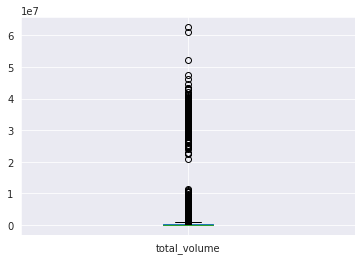

In [2113]:
df['total_volume'].plot.box()

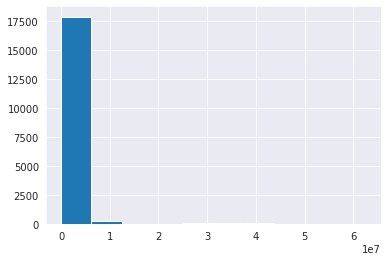

In [2114]:
df['total_volume'].hist()

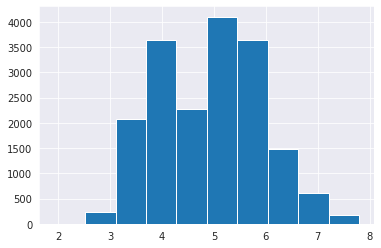

In [2115]:
df['total_volume_log'] = np.log10(df['total_volume'])
df['total_volume_log'].hist()

In [2116]:
mad = np.abs(df['total_volume_log'] - df['total_volume_log'].median()).median()*(1/0.6745)
print(mad)

1.178900456083008


In [2117]:
df['total_volume_log'].mad()

0.8443047122884397

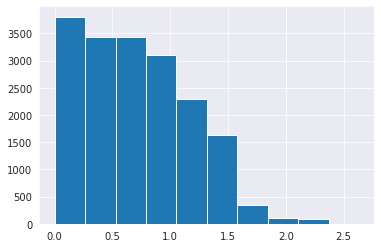

In [2118]:
(abs(df['total_volume_log']-df['total_volume_log'].median())/mad).hist()

In [2119]:
df[abs(df['total_volume_log']-df['total_volume_log'].median())/mad > 3.5]

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,total_volume_norm,average_price_dist,total_volume_log


In [2120]:
df = df[abs(df['total_volume_log']-df['total_volume_log'].median())/mad < 3.5]
print(len(df))

18249


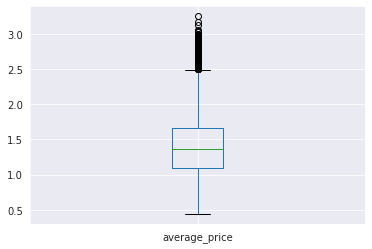

In [2121]:
df['average_price'].plot.box()

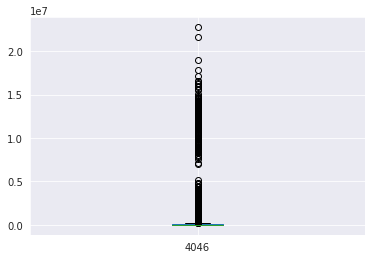

In [2122]:
df['4046'].plot.box()

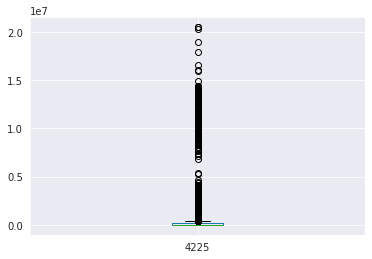

In [2123]:
df['4225'].plot.box()

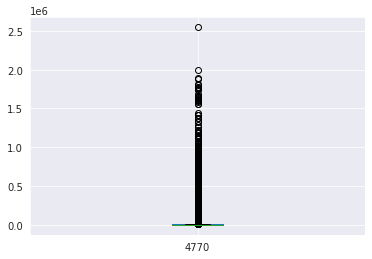

In [2124]:
df['4770'].plot.box()

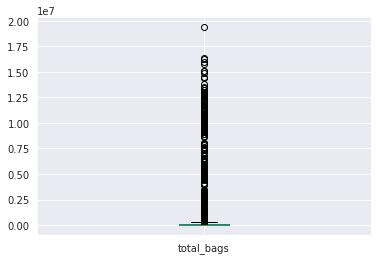

In [2125]:
df['total_bags'].plot.box()

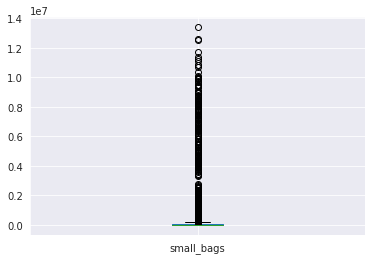

In [2126]:
df['small_bags'].plot.box()

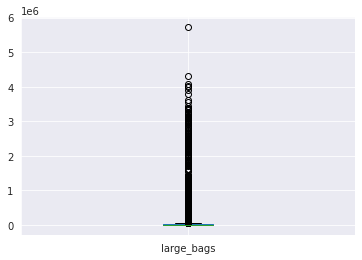

In [2127]:
df['large_bags'].plot.box()

###Método de tukey

In [2128]:
df['xlarge_bags'].describe()

count     18249.000000
mean       3106.426507
std       17692.894652
min           0.000000
25%           0.000000
50%           0.000000
75%         132.500000
max      551693.650000
Name: xlarge_bags, dtype: float64

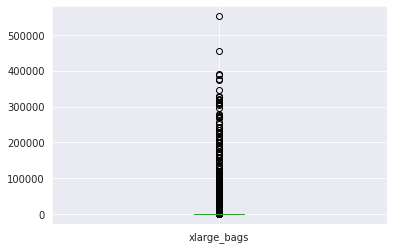

In [2129]:
df['xlarge_bags'].plot.box()

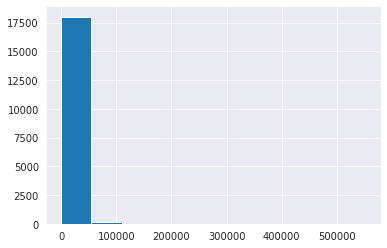

In [2130]:
# tirar o log não resolve pois há divisão por 0
df['xlarge_bags'].hist()

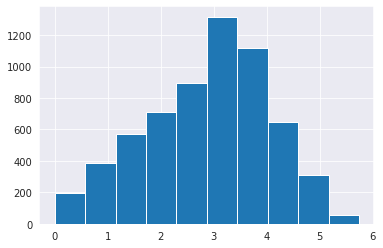

In [2131]:
# nova coluna com muitos valores nulos
df['xlarge_bags_log'] = np.log10(df[df['xlarge_bags'] != 0]['xlarge_bags'])
df['xlarge_bags_log'].hist()

In [2132]:
xlarge_bags_iqr = df['xlarge_bags_log'].describe()
iqr = xlarge_bags_iqr[6] - average_price_iqr[4]
iqr

2.5915217549438796

In [2133]:
df[df['xlarge_bags_log'] < (xlarge_bags_iqr[4]-1.5*iqr)]

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,total_volume_norm,average_price_dist,total_volume_log,xlarge_bags_log


In [2134]:
df[df['xlarge_bags_log'] > (xlarge_bags_iqr[6]+1.5*iqr)]

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,total_volume_norm,average_price_dist,total_volume_log,xlarge_bags_log


In [2135]:
#Como df1 = número de xlarge_bags != 0, não farei alteração no df
df1 = df[(df['xlarge_bags_log'] > (xlarge_bags_iqr[4]-1.5*iqr)) & (df['xlarge_bags_log'] < (xlarge_bags_iqr[6]+1.5*iqr))]
len(df1)

6201

In [2136]:
if len(df1) == len(df[df['xlarge_bags'] != 0]['xlarge_bags']):
  df.drop(['xlarge_bags_log'], axis='columns', inplace=True)
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,total_volume_norm,average_price_dist,total_volume_log
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,-0.227716,"(1.283, 1.564]",4.807783
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,-0.230427,"(1.283, 1.564]",4.739390
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,-0.212085,"(0.721, 1.002]",5.072692
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,-0.223444,"(1.002, 1.283]",4.897584
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,-0.231538,"(1.002, 1.283]",4.707907


###Razão de duas variáveis

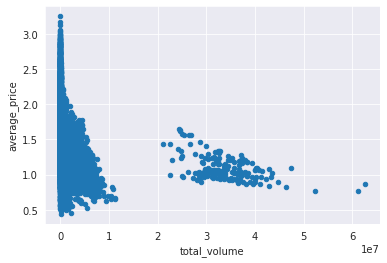

In [2137]:
df.plot.scatter(x='total_volume',y='average_price')

In [2138]:
df['yield'] = df['total_volume'] * df['average_price']
df['yield'].describe()

count    1.824900e+04
mean     9.279484e+05
std      3.686048e+06
min      1.344504e+02
25%      1.716418e+04
50%      1.395298e+05
75%      5.141914e+05
max      5.437991e+07
Name: yield, dtype: float64

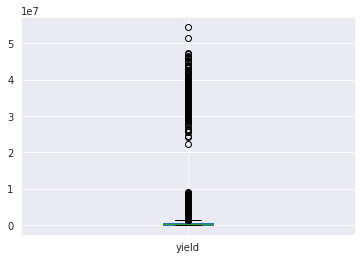

In [2139]:
df['yield'].plot.box()

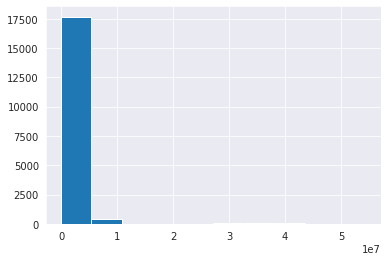

In [2140]:
df['yield'].hist()

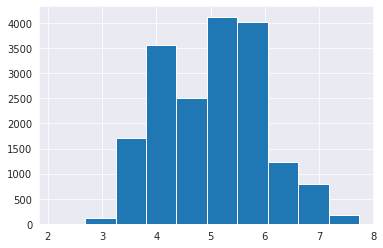

In [2141]:
df['yield_log'] = np.log10(df['yield'])
df['yield_log'].hist()


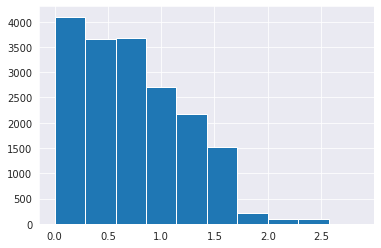

In [2142]:
mad = abs(df['yield_log'] - df['yield_log'].median()).median()*(1/0.6745)
(abs(df['yield_log']-df['yield_log'].median())/mad).hist()

In [2143]:
df[abs(df['yield_log']-df['yield_log'].median())/mad > 3.5]

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,total_volume_norm,average_price_dist,total_volume_log,yield,yield_log


In [2144]:
df = df[abs(df['yield_log']-df['yield_log'].median())/mad < 3.5]
print(len(df))

18249


##Estatísticas Univariadas
1. Cálculo da média (mean), mediana (median), moda (mode), variância (var), desvio padrão (std).

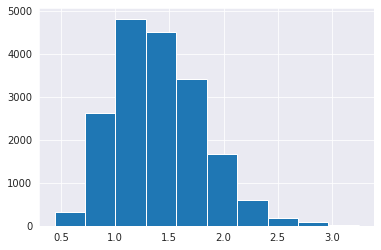

In [2145]:
df.average_price.hist()

In [2146]:
average_price_iqr = df['average_price'].describe()
average_price_iqr[6] - average_price_iqr[4]

0.5599999999999998

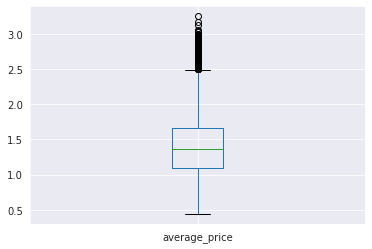

In [2147]:
df.boxplot(column=['average_price'])

In [2148]:
xlarge_bags_iqr = df['xlarge_bags'].describe()
xlarge_bags_iqr[6] - xlarge_bags_iqr[4]

132.5

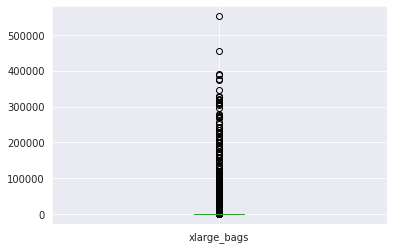

In [2149]:
df.boxplot(column=['xlarge_bags'])

In [2150]:
df['average_price'].describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: average_price, dtype: float64

In [2151]:
df['total_volume'].describe()

count    1.824900e+04
mean     8.506440e+05
std      3.453545e+06
min      8.456000e+01
25%      1.083858e+04
50%      1.073768e+05
75%      4.329623e+05
max      6.250565e+07
Name: total_volume, dtype: float64

In [2152]:
df['4046'].describe()

count    1.824900e+04
mean     2.930084e+05
std      1.264989e+06
min      0.000000e+00
25%      8.540700e+02
50%      8.645300e+03
75%      1.110202e+05
max      2.274362e+07
Name: 4046, dtype: float64

In [2153]:
df['4225'].describe()

count    1.824900e+04
mean     2.951546e+05
std      1.204120e+06
min      0.000000e+00
25%      3.008780e+03
50%      2.906102e+04
75%      1.502069e+05
max      2.047057e+07
Name: 4225, dtype: float64

In [2154]:
df['4770'].describe()

count    1.824900e+04
mean     2.283974e+04
std      1.074641e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.849900e+02
75%      6.243420e+03
max      2.546439e+06
Name: 4770, dtype: float64

In [2155]:
df['total_bags'].describe()

count    1.824900e+04
mean     2.396392e+05
std      9.862424e+05
min      0.000000e+00
25%      5.088640e+03
50%      3.974383e+04
75%      1.107834e+05
max      1.937313e+07
Name: total_bags, dtype: float64

In [2156]:
df['small_bags'].describe()

count    1.824900e+04
mean     1.821947e+05
std      7.461785e+05
min      0.000000e+00
25%      2.849420e+03
50%      2.636282e+04
75%      8.333767e+04
max      1.338459e+07
Name: small_bags, dtype: float64

In [2157]:
df['large_bags'].describe()

count    1.824900e+04
mean     5.433809e+04
std      2.439660e+05
min      0.000000e+00
25%      1.274700e+02
50%      2.647710e+03
75%      2.202925e+04
max      5.719097e+06
Name: large_bags, dtype: float64

In [2158]:
df['xlarge_bags'].describe()

count     18249.000000
mean       3106.426507
std       17692.894652
min           0.000000
25%           0.000000
50%           0.000000
75%         132.500000
max      551693.650000
Name: xlarge_bags, dtype: float64

In [2159]:
# mesmo valor do 2 quartil
print('Mediana do average_price:', df['average_price'].median())
print('Mediana do total_volume:', df['total_volume'].median())
print('Mediana do número de avocados vendidos com PLU 4046:', df['4046'].median())
print('Mediana do número de avocados vendidos com PLU 4225:', df['4225'].median())
print('Mediana do número de avocados vendidos com PLU 4770:', df['4770'].median())
print('Mediana do total_bags:', df['total_bags'].median())
print('Mediana do large_bags:', df['large_bags'].median())
print('Mediana do xlarge_bags:', df['xlarge_bags'].median())

Mediana do average_price: 1.37
Mediana do total_volume: 107376.76
Mediana do número de avocados vendidos com PLU 4046: 8645.3
Mediana do número de avocados vendidos com PLU 4225: 29061.02
Mediana do número de avocados vendidos com PLU 4770: 184.99
Mediana do total_bags: 39743.83
Mediana do large_bags: 2647.71
Mediana do xlarge_bags: 0.0


In [2160]:
print('Moda do average_price:', df['average_price'].mode()[0])
print('Moda do total_volume:', df['total_volume'].mode()[0])
print('Moda do número de avocados vendidos com PLU 4046:', df['4046'].mode()[0])
print('Moda do número de avocados vendidos com PLU 4225:', df['4225'].mode()[0])
print('Moda do número de avocados vendidos com PLU 4770:', df['4770'].mode()[0])
print('Moda do total_bags:', df['total_bags'].mode()[0])
print('Moda do large_bags:', df['large_bags'].mode()[0])
print('Moda do xlarge_bags:', df['xlarge_bags'].mode()[0])

Moda do average_price: 1.15
Moda do total_volume: 2038.99
Moda do número de avocados vendidos com PLU 4046: 0.0
Moda do número de avocados vendidos com PLU 4225: 0.0
Moda do número de avocados vendidos com PLU 4770: 0.0
Moda do total_bags: 0.0
Moda do large_bags: 0.0
Moda do xlarge_bags: 0.0


## Estatísticas Descritivas - Questionamentos


####1. Em qual data o preço médio do avocado foi mais alto?

In [2161]:
df[df['average_price'] == df['average_price'].max()][['date', 'average_price']]

,date,average_price
14125,2016-10-30,3.25


####2. Em qual data o volume total de avocado foi mais alto?

In [2162]:
df[df['total_volume'] == df['total_volume'].max()][['date', 'total_volume']]

,date,total_volume
9097,2018-02-04,62505646.52


####3. Quantos avocados foram vendidos na região de Albany em cada ano?

In [2163]:
df1 = df.groupby(['region', 'year']).sum()
df1.reset_index(inplace=True)
df1 = df1[df1['region'] == 'Albany'][['region', 'year', 'total_volume']]
df1

,region,year,total_volume
0,Albany,2015,4029896.43
1,Albany,2016,5264335.59
2,Albany,2017,5231581.78
3,Albany,2018,1541986.17


####4. O avocado orgânico é mais popular que o convencional?

In [2164]:
df1 = df.groupby('type').sum()
df1.reset_index(inplace=True)
conventional = df1[df1['type'] == 0]['total_volume']
conventional.reset_index(inplace=True,drop = True)
organic = df1[df1['type'] == 1]['total_volume']
organic.reset_index(inplace=True,drop = True)
print(organic[0] > conventional[0])

False


####5. Qual o ano em que o preço médio do avocado chegou ao topo?

In [2165]:
df[df['average_price'] == df['average_price'].max()][['year', 'average_price']]

,year,average_price
14125,2016,3.25


####6. Plotagem da comparação de vendas com sacolas pequenas, grandes e extra grandes.

<BarContainer object of 10 artists>

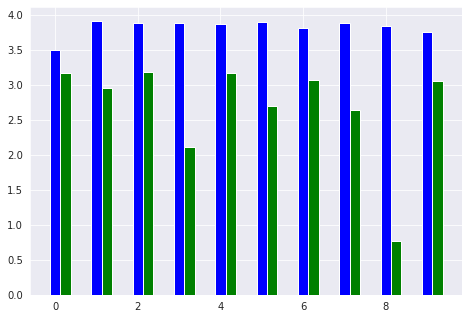

In [2166]:
#Mesmo com o log as xlarge_bags não fazem diferença no gráfico, possivelmente pq a maioria é igual a zero
X = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, df['small_bags'][18200:18210].apply(np.log10), color = 'b', width = 0.25)
ax.bar(X + 0.25, df['large_bags'][18200:18210].apply(np.log10), color = 'g', width = 0.25)
ax.bar(X + 0.50, df['xlarge_bags'][18200:18210].apply(np.log10), color = 'r', width = 0.25)

####7. Qual o valor do PLU que teve mais avocados vendidos em 2016?


In [2167]:
df1 = df[df['year'] == 2016]
df1.reset_index(inplace=True,drop = True)
df1 = df1.sum()
if df1['4046'] > df1['4225'] and df1['4046'] > df1['4770']:
  print('4046')
elif df1['4225'] > df1['4046'] and df1['4225'] > df1['4770']:
  print('4225')
elif df1['4770'] > df1['4225'] and df1['4770'] > df1['4046']:
  print('4770')
else: print('None') 


4225


####8. No ano de 2017 qual região lucrou mais com a venda de avocados?

In [2168]:
df1 = df[df['year']==2017]
df1.reset_index(inplace=True,drop = True)
df1['yield'] = df1['average_price']*df1['total_volume']
df1 = df1.groupby('region').sum()
df1.reset_index(inplace=True)
df1[df1['yield'] == df1['yield'].max()][['region', 'yield']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,region,yield
51,TotalUS,2.250704e+09


####9. Calcule o volume total de avocados vendido por ano em cada região.

In [2169]:
df1 = df.groupby(['region', 'year'])['total_volume'].sum()
df1.head(20)

region               year
Albany               2015     4029896.43
                     2016     5264335.59
                     2017     5231581.78
                     2018     1541986.17
Atlanta              2015    23231698.12
                     2016    28326878.30
                     2017    28815119.98
                     2018     8231422.45
BaltimoreWashington  2015    40645579.54
                     2016    40893802.32
                     2017    41015634.46
                     2018    12158903.00
Boise                2015     3784357.34
                     2016     4653509.53
                     2017     4760561.31
                     2018     1214759.57
Boston               2015    27454991.64
                     2016    30571315.07
                     2017    30610672.16
                     2018     8637005.96
Name: total_volume, dtype: float64

####10. Média (mean), mediana(median), desvio padrão(std) e variância(var) de cada coluna em cada ano.

In [2170]:
df.groupby('year').agg(['mean', 'median', 'std', 'var'])

average_price                   ... yield_log                    
              mean median       std  ...    median       std       var
year                                 ...                              
2015      1.375590  1.300  0.375595  ...  5.002232  0.970901  0.942649
2016      1.338640  1.300  0.393708  ...  5.139787  0.925043  0.855704
2017      1.515128  1.490  0.432906  ...  5.233321  0.882402  0.778634
2018      1.347531  1.345  0.305858  ...  5.295823  0.860720  0.740839

[4 rows x 56 columns]

####11. Média (mean), mediana(median), desvio padrão(std) e variância(var) de cada coluna para cada região em cada ano.

In [2171]:
df.groupby(['region', 'year']).agg(['mean', 'median', 'std', 'var'])

average_price         ... yield_log          
                               mean median  ...       std       var
region           year                       ...                    
Albany           2015      1.538750  1.520  ...  0.786600  0.618740
                 2016      1.533942  1.520  ...  0.833024  0.693930
                 2017      1.637830  1.615  ...  0.741531  0.549868
                 2018      1.435833  1.460  ...  0.728544  0.530777
Atlanta          2015      1.380577  1.170  ...  0.839407  0.704604
...                             ...    ...  ...       ...       ...
West             2018      1.297083  1.245  ...  0.642508  0.412816
WestTexNewMexico 2015      1.259320  0.920  ...  0.805124  0.648224
                 2016      1.246635  1.115  ...  0.733916  0.538632
                 2017      1.281538  1.150  ...  0.730108  0.533058
                 2018      1.251250  1.240  ...  0.756398  0.572138

[216 rows x 56 columns]

####12. Medianas do volume total para cada região.

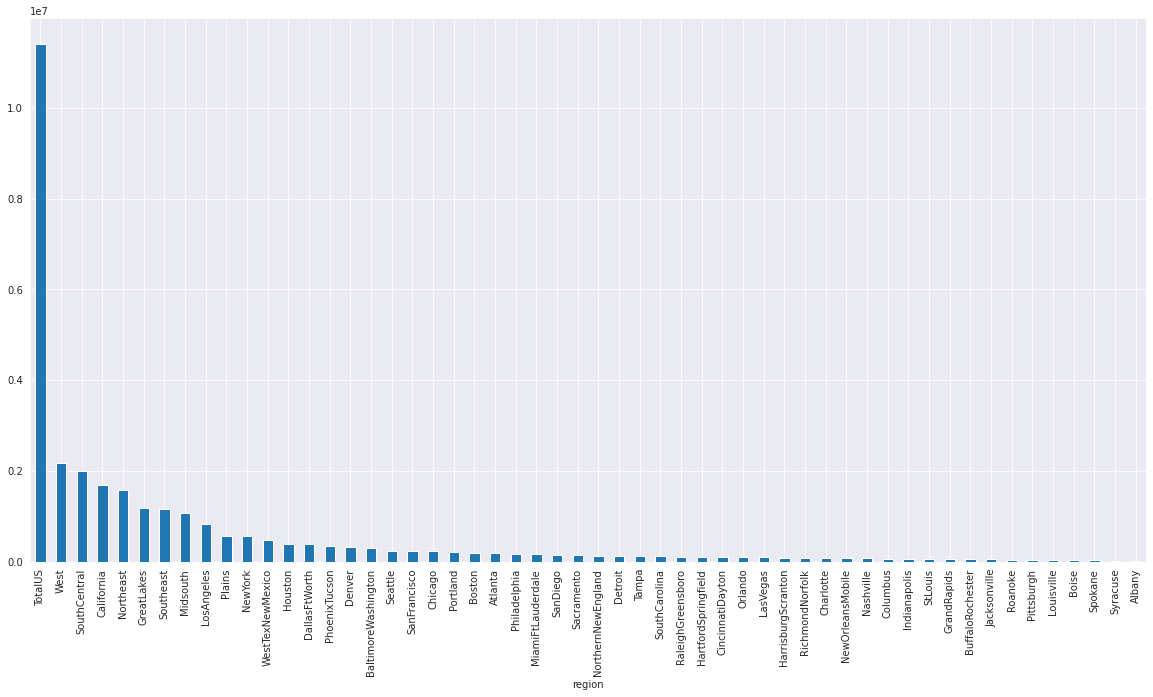

In [2172]:
df.groupby('region')['total_volume'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

####13. Médias do volume total para cada região.

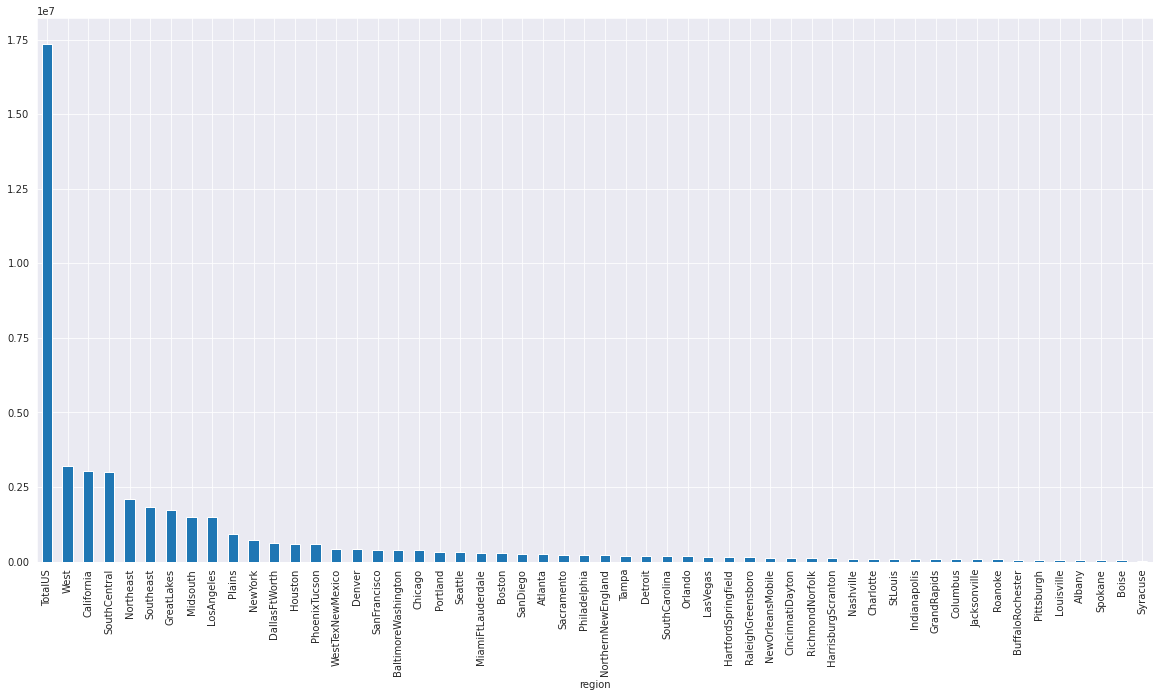

In [2173]:
df.groupby('region')['total_volume'].mean().sort_values(ascending=False).plot.bar(figsize=(20,10))

####14. Médias do volume total para cada ano.

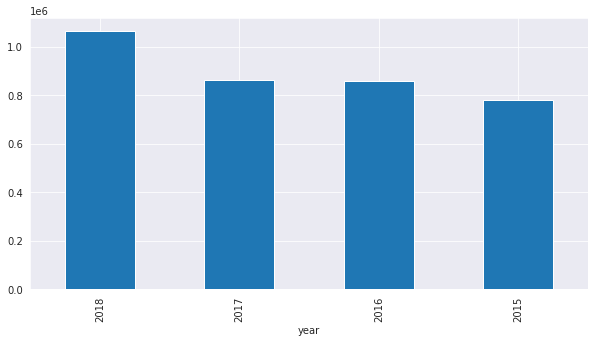

In [2174]:
df.groupby('year')['total_volume'].mean().sort_values(ascending=False).plot.bar(figsize=(10,5))

####15. Amplitude interquartílica




In [2175]:
q1 = df['total_volume'].quantile(q=0.25)
q3 = df['total_volume'].quantile(q=0.75)
amp = q3 - q1
lim_max_prod_est = q3 + (amp * 1.5)
lim_min_prod_est = q1 - (amp * 1.5)
print(q1, q3, lim_min_prod_est, lim_max_prod_est)

10838.58 432962.29 -622346.985 1066147.855


####16. Rendimento das vendas no país

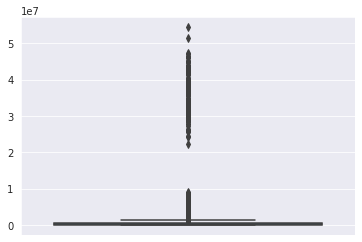

In [2176]:
yield1 = (df['average_price'] * df['total_volume'])
sns.boxplot(y = yield1)

##Estatísticas Bivariadas

In [2177]:
df.cov()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,total_volume_norm,total_volume_log,yield,yield_log
average_price,0.162148,-2.680534e+05,-1.061128e+05,-8.384767e+04,-7.765213e+03,-7.032811e+04,-5.250081e+04,-1.698952e+04,-8.377831e+02,0.123997,-7.761899e-02,-2.340015e-01,-2.420286e+05,-1.842451e-01
total_volume,-268053.371641,1.192698e+13,4.271988e+12,4.051116e+12,3.237022e+11,3.280170e+12,2.492536e+12,7.419807e+11,4.565372e+10,-401372.405118,3.453640e+06,1.564045e+06,1.255057e+13,1.476756e+06
4046,-106112.839423,4.271988e+12,1.600197e+12,1.410650e+12,1.132916e+11,1.147850e+12,8.733788e+11,2.588178e+11,1.565299e+10,-142832.915111,1.237020e+06,5.556757e+05,4.465405e+12,5.201997e+05
4225,-83847.671587,4.051116e+12,1.410650e+12,1.449906e+12,1.148882e+11,1.075672e+12,8.230438e+11,2.379536e+11,1.467464e+10,-139856.025268,1.173063e+06,5.358940e+05,4.258458e+12,5.093187e+05
4770,-7765.212885,3.237022e+11,1.132916e+11,1.148882e+11,1.154853e+10,8.397392e+10,6.436905e+10,1.831222e+10,1.292654e+09,-11285.503667,9.373297e+04,4.222087e+04,3.299563e+11,3.968011e+04
total_bags,-70328.114110,3.280170e+12,1.147850e+12,1.075672e+12,8.397392e+10,9.726741e+11,7.317436e+11,2.268970e+11,1.403344e+10,-107399.001348,9.498239e+05,4.302533e+05,3.496749e+12,4.075559e+05
small_bags,-52500.812494,2.492536e+12,8.733788e+11,8.230438e+11,6.436905e+10,7.317436e+11,5.567824e+11,1.643092e+11,1.065201e+10,-82281.586939,7.217522e+05,3.280537e+05,2.657252e+12,3.111908e+05
large_bags,-16989.518346,7.419807e+11,2.588178e+11,2.379536e+11,1.831222e+10,2.268970e+11,1.643092e+11,5.951939e+10,3.068395e+09,-23564.969714,2.148520e+05,9.637447e+04,7.892481e+11,9.079965e+04
xlarge_bags,-837.783149,4.565372e+10,1.565299e+10,1.467464e+10,1.292654e+09,1.403344e+10,1.065201e+10,3.068395e+09,3.130385e+08,-1552.444503,1.321974e+04,5.825130e+03,5.024876e+10,5.565446e+03
type,0.123997,-4.013724e+05,-1.428329e+05,-1.398560e+05,-1.128550e+04,-1.073990e+05,-8.228159e+04,-2.356497e+04,-1.552445e+03,0.250014,-1.162236e-01,-3.966833e-01,-4.266257e+05,-3.578627e-01


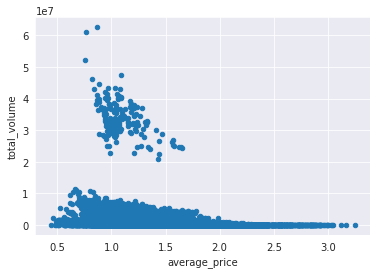

In [2178]:
df.plot.scatter(x='average_price', y='total_volume')

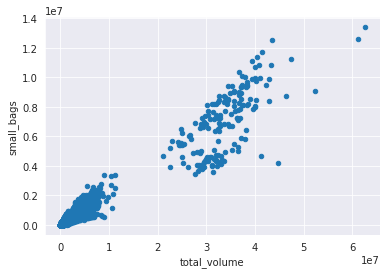

In [2179]:
df.plot.scatter(x='total_volume', y='small_bags')

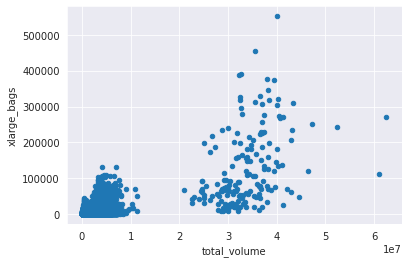

In [2180]:
df.plot.scatter(x='total_volume', y='xlarge_bags')

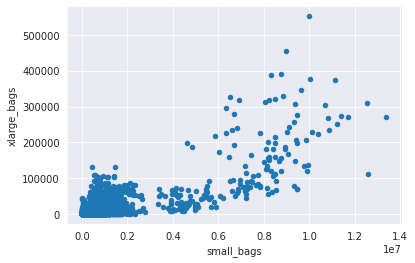

In [2181]:
df.plot.scatter(x='small_bags', y='xlarge_bags')

In [2182]:
df.corr(method='pearson')

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,total_volume_norm,total_volume_log,yield,yield_log
average_price,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,-0.192752,-0.583409,-0.163061,-0.493513
total_volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,1.000000,0.454668,0.985910,0.461214
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.977863,0.441007,0.957664,0.443550
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,0.974181,0.446807,0.959448,0.456225
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,0.872202,0.394434,0.832975,0.398262
total_bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.963047,0.437977,0.961877,0.445721
small_bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.967238,0.441380,0.966115,0.449825
large_bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.880640,0.396591,0.877654,0.401434
xlarge_bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.747157,0.330535,0.770487,0.339281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.232434,-0.796476,-0.231475,-0.771958


In [2183]:
df.corr(method='spearman')

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,total_volume_norm,total_volume_log,yield,yield_log
average_price,1.000000,-0.612239,-0.596170,-0.513732,-0.532825,-0.596972,-0.536403,-0.511142,-0.427207,0.643803,-0.612239,-0.612239,-0.524806,-0.524806
total_volume,-0.612239,1.000000,0.902887,0.940025,0.828223,0.952550,0.925874,0.702067,0.659949,-0.808466,1.000000,1.000000,0.993324,0.993324
4046,-0.596170,0.902887,1.000000,0.793939,0.754838,0.837121,0.822036,0.638535,0.615535,-0.747638,0.902887,0.902887,0.891835,0.891835
4225,-0.513732,0.940025,0.793939,1.000000,0.819905,0.856946,0.833764,0.635465,0.628893,-0.780646,0.940025,0.940025,0.944082,0.944082
4770,-0.532825,0.828223,0.754838,0.819905,1.000000,0.779323,0.780185,0.571869,0.652807,-0.778786,0.828223,0.828223,0.820721,0.820721
total_bags,-0.596972,0.952550,0.837121,0.856946,0.779323,1.000000,0.961018,0.753044,0.652582,-0.754680,0.952550,0.952550,0.945898,0.945898
small_bags,-0.536403,0.925874,0.822036,0.833764,0.780185,0.961018,1.000000,0.603582,0.641796,-0.755760,0.925874,0.925874,0.926569,0.926569
large_bags,-0.511142,0.702067,0.638535,0.635465,0.571869,0.753044,0.603582,1.000000,0.500590,-0.525241,0.702067,0.702067,0.685591,0.685591
xlarge_bags,-0.427207,0.659949,0.615535,0.628893,0.652807,0.652582,0.641796,0.500590,1.000000,-0.672069,0.659949,0.659949,0.653948,0.653948
type,0.643803,-0.808466,-0.747638,-0.780646,-0.778786,-0.754680,-0.755760,-0.525241,-0.672069,1.000000,-0.808466,-0.808466,-0.788077,-0.788077


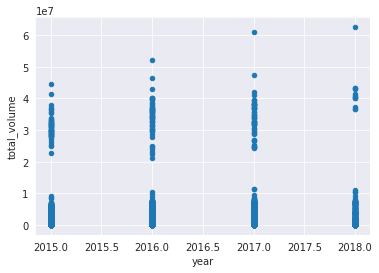

In [2184]:
df.plot.scatter(x='year', y='total_volume')

##Tentativas de gráficos legais

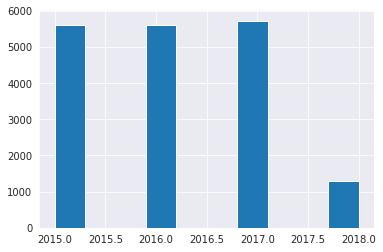

In [2185]:
# poucas amostras de 2018 comparado aos outros
df['year'].hist()

<BarContainer object of 10 artists>

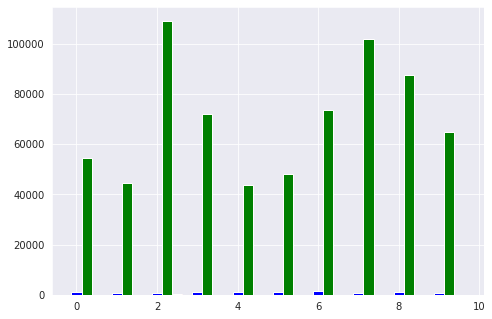

In [2186]:
# comparação impossível
X = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, df['4046'][0:10], color = 'b', width = 0.25)
ax.bar(X + 0.25, df['4225'][0:10], color = 'g', width = 0.25)
ax.bar(X + 0.50, df['4770'][0:10], color = 'r', width = 0.25)

<BarContainer object of 10 artists>

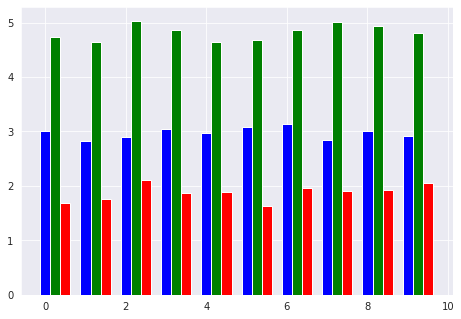

In [2187]:
# comparando os valores iniciais de venda de cada PLU e concluindo que os valores da PLU 4225
X = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, df['4046'][0:10].apply(np.log10), color = 'b', width = 0.25)
ax.bar(X + 0.25, df['4225'][0:10].apply(np.log10), color = 'g', width = 0.25)
ax.bar(X + 0.50, df['4770'][0:10].apply(np.log10), color = 'r', width = 0.25)

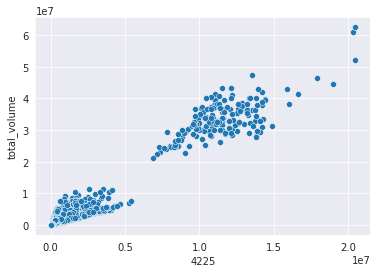

In [2188]:
sns.set_style("darkgrid")
ax = sns.scatterplot(x="4225", y="total_volume", data=df)

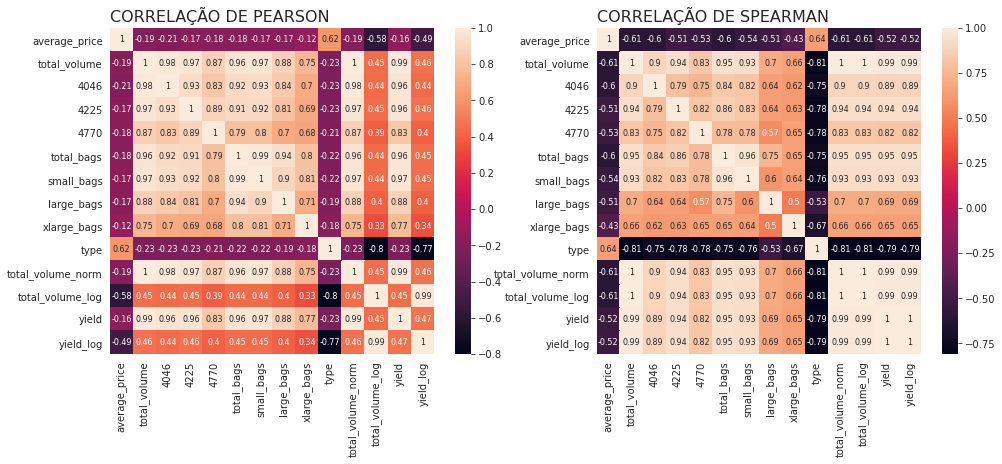

In [2189]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(np.round(df.corr(method='pearson'), 2), annot=True, ax=ax1, annot_kws={"fontsize": 8})
sns.heatmap(np.round(df.corr(method='spearman'), 2), annot=True, ax=ax2, annot_kws={"fontsize": 8})

ax1.set_title("Correlação de Pearson".upper(), loc="left", fontsize=16)
ax2.set_title("Correlação de Spearman".upper(), loc="left", fontsize=16);

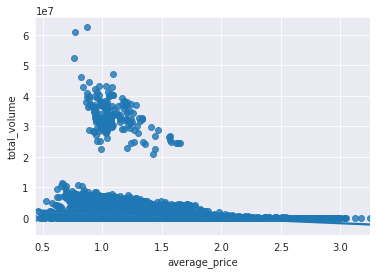

In [2190]:
sns.regplot(y='total_volume', x='average_price', data=df)

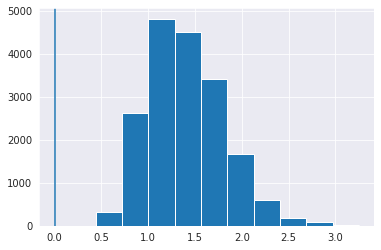

In [2191]:
plt.hist(df["average_price"])

plt.axvline()

##Testes de Hipótese
1. A venda de avocados foi melhor no verão do que no outono no ano de 2016.
2. O preço médio de avocados diminuiu de 2016 para 2017.

In [2192]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,total_volume_norm,average_price_dist,total_volume_log,yield,yield_log
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,-0.227716,"(1.283, 1.564]",4.807783,85434.7046,4.931634
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,-0.230427,"(1.283, 1.564]",4.739390,74083.9230,4.869724
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,-0.212085,"(0.721, 1.002]",5.072692,109944.8046,5.041175
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,-0.223444,"(1.002, 1.283]",4.897584,85311.5220,4.931008
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,-0.231538,"(1.002, 1.283]",4.707907,65330.6880,4.815117


In [2193]:
from statsmodels.stats.weightstats import ztest

- Estatística 1

$\Large{stats = \mu_{verao} - \mu_{outono}}$
 
$\Large{H_0: stats <= 0}$

$\Large{H_1: stats > 0}$

In [2194]:
#verão = 21 de junho a 23 de setembro
#outono = 22 ou 23 de setembro a 22 de dezembro.
verao1 = df[df['date'] >= '2016-06-21']
verao2 = df[df['date'] <= '2016-09-22']
verao = pd.concat([verao1,verao2])
outono1 = df[df['date'] >= '2016-09-23']
outono2 = df[df['date'] >= '2016-12-22']
outono = pd.concat([outono1,outono2])

aproveitamento_verao = verao['total_volume'].reset_index(drop = True)
aproveitamento_verao = aproveitamento_verao[aproveitamento_verao < np.quantile(aproveitamento_verao, .95)]
aproveitamento_outono = outono['total_volume'].reset_index(drop = True)
aproveitamento_outono = aproveitamento_outono[aproveitamento_outono < np.quantile(aproveitamento_outono, .95)]

t, pvalue = ztest(aproveitamento_verao, aproveitamento_outono, value=0, alternative="larger")
pvalue



0.9753044870531273

Como o P-Value é maior do que 0.05, falhamos em rejeitar a hipótese nula.

- Estatística 2

$\Large{stats = \mu_{2017} - \mu_{2016}}$
 
$\Large{H_0: stats <= 0}$

$\Large{H_1: stats > 0}$

In [2196]:
average_price_2017 = df[df['year'] == 2017].reset_index(drop = True)['average_price']
average_price_2017 = average_price_2017[average_price_2017 < np.quantile(average_price_2017, .95)]
average_price_2016 = df[df['year'] == 2016].reset_index(drop = True)['average_price']
average_price_2016 = average_price_2016[average_price_2016 < np.quantile(average_price_2016, .95)]

t, pvalue = ztest(average_price_2016, average_price_2017, value=0, alternative="larger")
pvalue

1.0

Como o P-Value é maior do que 0.05, falhamos em rejeitar a hipótese nula.